In [1]:
from pyspark.sql import SQLContext
from handyspark import *
from pyspark.sql import functions as sf
from matplotlib import pyplot as plt
from pyspark.sql.functions import col, avg
import pandas as pd
from pyspark.ml.feature import VectorAssembler
import numpy as np
from pyspark.ml.clustering import KMeans
from pyspark.sql import Row
import pyspark

In [2]:
sc.stop()
sc = pyspark.SparkContext(master="spark://172.16.27.115:7077",appName="spark")
sc

<SparkContext master=spark://172.16.27.115:7077 appName=spark>

## Load Average Profile csv

In [10]:
base_path = "/media/iitp/disk/smart-meters-in-london/"
sqlcontext = SQLContext(sc)
avg_power_df = sqlcontext.read.format("com.databricks.spark.csv").load(base_path+"avg.csv/*")#csv(base_path+"avg.csv/",header=True,inferSchema=True)
avg_power_df.count()

Py4JJavaError: An error occurred while calling o354.count.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 1 in stage 2.0 failed 4 times, most recent failure: Lost task 1.3 in stage 2.0 (TID 11, 172.16.26.154, executor 1): java.io.FileNotFoundException: File file:/media/iitp/disk/smart-meters-in-london/avg.csv/part-00003-f2319c85-fa2e-44f8-82a1-a0293d45f199-c000.csv does not exist
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:127)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:177)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:101)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.agg_doAggregateWithoutKey_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$11$$anon$1.hasNext(WholeStageCodegenExec.scala:619)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:125)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:55)
	at org.apache.spark.scheduler.Task.run(Task.scala:121)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:402)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:408)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	at java.lang.Thread.run(Thread.java:748)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1887)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1875)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1874)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1874)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:926)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:926)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2108)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2057)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2046)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:737)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2061)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2082)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2101)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2126)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:945)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:363)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:944)
	at org.apache.spark.sql.execution.SparkPlan.executeCollect(SparkPlan.scala:299)
	at org.apache.spark.sql.Dataset$$anonfun$count$1.apply(Dataset.scala:2831)
	at org.apache.spark.sql.Dataset$$anonfun$count$1.apply(Dataset.scala:2830)
	at org.apache.spark.sql.Dataset$$anonfun$53.apply(Dataset.scala:3365)
	at org.apache.spark.sql.execution.SQLExecution$$anonfun$withNewExecutionId$1.apply(SQLExecution.scala:78)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:125)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:73)
	at org.apache.spark.sql.Dataset.withAction(Dataset.scala:3364)
	at org.apache.spark.sql.Dataset.count(Dataset.scala:2830)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)
Caused by: java.io.FileNotFoundException: File file:/media/iitp/disk/smart-meters-in-london/avg.csv/part-00003-f2319c85-fa2e-44f8-82a1-a0293d45f199-c000.csv does not exist
It is possible the underlying files have been updated. You can explicitly invalidate the cache in Spark by running 'REFRESH TABLE tableName' command in SQL or by recreating the Dataset/DataFrame involved.
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.org$apache$spark$sql$execution$datasources$FileScanRDD$$anon$$readCurrentFile(FileScanRDD.scala:127)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.nextIterator(FileScanRDD.scala:177)
	at org.apache.spark.sql.execution.datasources.FileScanRDD$$anon$1.hasNext(FileScanRDD.scala:101)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.agg_doAggregateWithoutKey_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenExec$$anonfun$11$$anon$1.hasNext(WholeStageCodegenExec.scala:619)
	at scala.collection.Iterator$$anon$11.hasNext(Iterator.scala:409)
	at org.apache.spark.shuffle.sort.BypassMergeSortShuffleWriter.write(BypassMergeSortShuffleWriter.java:125)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:99)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:55)
	at org.apache.spark.scheduler.Task.run(Task.scala:121)
	at org.apache.spark.executor.Executor$TaskRunner$$anonfun$10.apply(Executor.scala:402)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1360)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:408)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1142)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:617)
	... 1 more


## Adding "`" to properly  select OW Analysis exception

### just to be clear, the reason for this is that the column name has a period in it. Spark is in general a little buggy as far as properly supporting backticks throughout codebase, but in this case they're fine

In [42]:
old_Feature_cols = []
new_Feature_cols = []
for i in range(1,49):
    if i<20:
        old_Feature_cols.append("0"+str(i*0.5))
    else:
        old_Feature_cols.append(str(i*0.5))
    if i<10:
        new_Feature_cols.append("0"+str(i))
    else:
        new_Feature_cols.append(str(i))
        
for c,n in zip(old_Feature_cols,new_Feature_cols):
            avg_power_df=avg_power_df.withColumnRenamed(c,n)
# avg_power_df.printSchema()

###### TODO : Scaling Feature using MinMaxSacler or any other can be done

In [43]:
avg_house_data = avg_power_df
vecAssembler = VectorAssembler(inputCols=new_Feature_cols, outputCol="features")
df_kmeans = vecAssembler.transform(avg_power_df)
df_kmeans.take(1)

[Row(LCLid='MAC005492', 01=0.15770309653916223, 02=0.143551912568306, 03=0.13106921675774133, 04=0.11505100182149361, 05=0.10827868852459034, 06=0.10192896174863399, 07=0.09966484517304186, 08=0.10130601092896187, 09=0.10093260473588352, 10=0.10278870673952646, 11=0.09768670309653929, 12=0.10551001821493623, 13=0.10079234972677609, 14=0.10559562841530062, 15=0.1185664845173042, 16=0.13059016393442607, 17=0.15293442622950815, 18=0.1490655737704919, 19=0.1633788706739527, 20=0.1741621129326048, 21=0.1547704918032785, 22=0.15020400710382517, 23=0.15035336976320574, 24=0.15187249544626577, 25=0.14747540983606544, 26=0.1550765027322402, 27=0.14759198542805102, 28=0.1539544626593806, 29=0.14597267759562832, 30=0.14188342440801455, 31=0.13967883211678833, 32=0.14339526411657547, 33=0.15505282349726773, 34=0.16574863387978161, 35=0.18467941712204017, 36=0.21457377067395259, 37=0.23843351548269573, 38=0.23322040072859737, 39=0.23493442622950805, 40=0.22763570127504554, 41=0.22324590163934438, 4

## Chosing K

In [44]:
wsse = np.zeros(10)
for k in range(2,10):
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(df_kmeans.select("features"))
    wsse[k] = model.computeCost(df_kmeans) 
    print(wsse[k])

21.108089786680253
9.226551334320753
6.701126059637317
4.869814462454744
4.284822365805687
2.3166016458681615
2.2814524097911626
1.8567138320331278


Text(0, 0.5, 'cost')

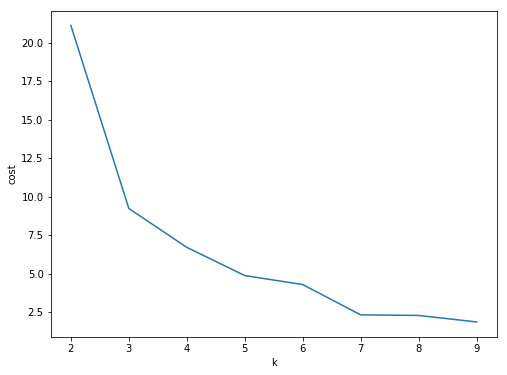

In [45]:
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),wsse[2:10])
ax.set_xlabel('k')
ax.set_ylabel('cost')

### k = 7 from elbow method
### Train Model

In [46]:
k = 7
kmeans = KMeans().setK(7).setSeed(1).setFeaturesCol("features")
model = kmeans.fit(df_kmeans.select("features"))
centers = model.clusterCenters()

for i in range(len(centers)):
    centers[i] = centers[i].tolist()
# print("Cluster Centers: ")
# for center in centers:
#     print(center)
type(centers)

list

In [47]:
transformed = model.transform(df_kmeans)
transformed.select("prediction").show()

+----------+
|prediction|
+----------+
|         1|
|         2|
|         1|
|         0|
|         2|
|         1|
|         2|
|         1|
|         5|
|         1|
|         6|
|         3|
|         2|
|         4|
|         5|
+----------+



In [48]:
cluster_centroid_rdd = sc.parallelize(centers)
cluster_centroid_rdd = cluster_centroid_rdd.flatMap(lambda x: Row(x))
cluster_centroid_rdd.collect()

[[0.36572800020000024,
  0.3399740002000003,
  0.31586399999999987,
  0.3051580000000001,
  0.33366999999999986,
  0.3231239997999999,
  0.31318800000000035,
  0.31917399980000005,
  0.32849800000000007,
  0.3845959999999999,
  0.44480399999999964,
  0.4841560007999998,
  0.4785059992000002,
  0.4598059997999998,
  0.43528600039999976,
  0.47459399919999995,
  0.5029799999999998,
  0.6360100001999999,
  0.6801100005999998,
  0.8793979992000001,
  0.8991019976000011,
  0.9444640008000003,
  0.9714979997999996,
  0.9449979989999991,
  0.9352399994,
  1.0829100011999997,
  1.107540000000001,
  1.302815999999999,
  1.232613999600001,
  1.0701619976000003,
  0.9432324639278559,
  0.9106460003999994,
  0.9365700010000002,
  0.9332640004000001,
  0.9150920008000001,
  0.8878279996000005,
  0.8627300004000006,
  0.8267920002,
  0.8280980005999997,
  0.8872419988000011,
  0.8738700015999997,
  0.799501998,
  0.7166180000000001,
  0.6139940004,
  0.5286659984000002,
  0.49079599919999983,
  0.47

In [49]:
df_cluster_center=sqlcontext.createDataFrame(cluster_centroid_rdd,new_Feature_cols)
type(df_cluster_center)

pyspark.sql.dataframe.DataFrame

In [55]:
avg_house_data.show()

+---------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
|    LCLid|                 

If we don't assign color all plot will be of different color,
by putting ax=ax we are plotting on same graph,
if removed new graph below will be plotted.

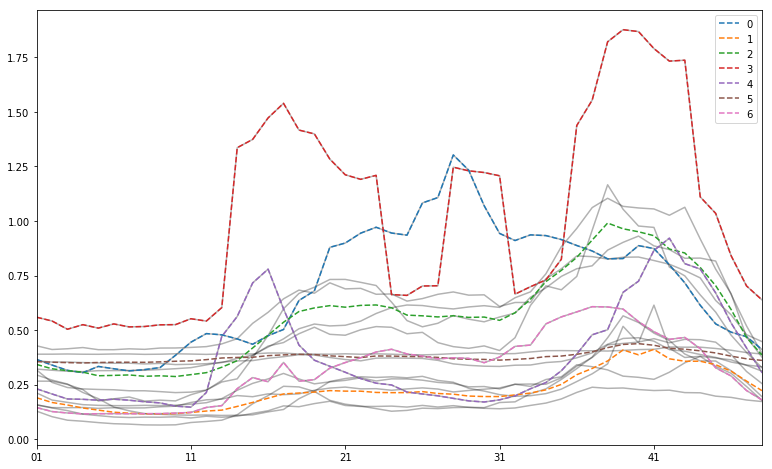

In [75]:
ax = avg_house_data.toPandas().set_index("LCLid").T.plot(figsize=(13,8), legend=False, color='black',alpha=0.3)
df_cluster_center.toPandas().T.plot(ax=ax,alpha=1,style='--')